Correlation coefficient: 0.0031845291135032773
P-value: 0.9198854967285744
Result: Fail to reject H0 → No significant correlation


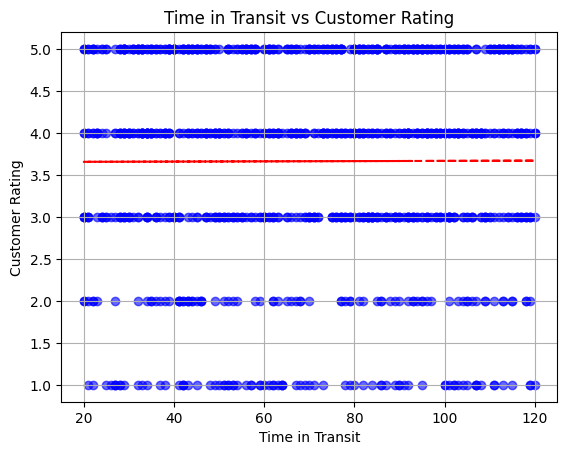

In [1]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


# 1. Loading our datasets
orders = pd.read_csv("quickbazaar_orders.csv")
delivery = pd.read_csv("quickbazaar_delivery_operations.csv")

# 2. Preparing data
ratings = orders["CustomerRating"].dropna().reset_index(drop=True)
transit_times = delivery["TimeInTransit"].dropna().reset_index(drop=True)

min_len = min(len(ratings), len(transit_times)) 
ratings = ratings[:min_len]
transit_times = transit_times[:min_len]  # Making them the same length

# 3. Calculating Pearson correlation
corr, p_value = pearsonr(transit_times, ratings)
print("Correlation coefficient:", corr)
print("P-value:", p_value)


# 4. Hypothesis Testing: Delivery Time vs Customer Rating
# H0: No correlation between TimeInTransit and CustomerRating
# H1: There is correlation

if p_value < 0.05:
    print("Result: Reject H0 → Significant correlation exists")
else:
    print("Result: Fail to reject H0 → No significant correlation")


# 6. Visualization

plt.scatter(transit_times, ratings, color='blue', alpha=0.6)
plt.xlabel("Time in Transit")
plt.ylabel("Customer Rating")
plt.title("Time in Transit vs Customer Rating")
plt.grid(True)

# Trendline
import numpy as np
z = np.polyfit(transit_times, ratings, 1)
p = np.poly1d(z)
plt.plot(transit_times, p(transit_times), "r--")  # red dashed trendline

plt.show()


--- Orders Dataset: AOV vs Customer Rating ---
Pearson correlation coefficient: 0.17670024602452286
p-value: 1.8541984337332267e-08
Result: Reject H0 → Significant correlation exists


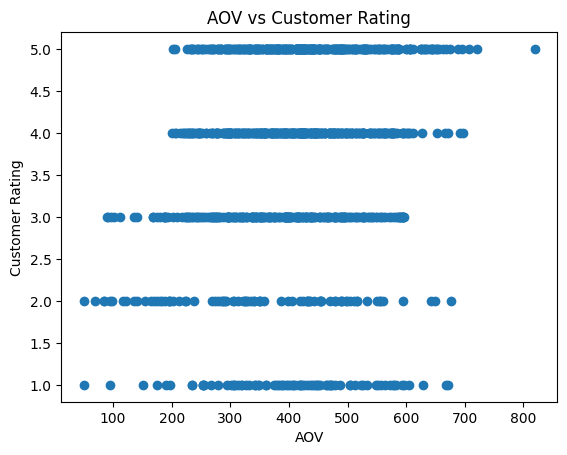


--- Delivery Dataset: Time to Dispatch vs Time in Transit ---
Pearson correlation coefficient: 0.027485744101849282
p-value: 0.38525612788635816
Result: Fail to reject H0 → No significant correlation


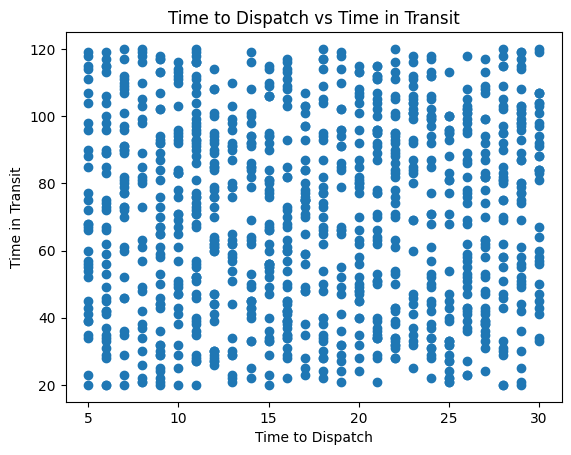


--- Inventory Dataset: Week vs Stockout Incidents ---
Pearson correlation coefficient: 0.025810331362330644
p-value: 0.8812211578843897
Result: Fail to reject H0 → No significant correlation


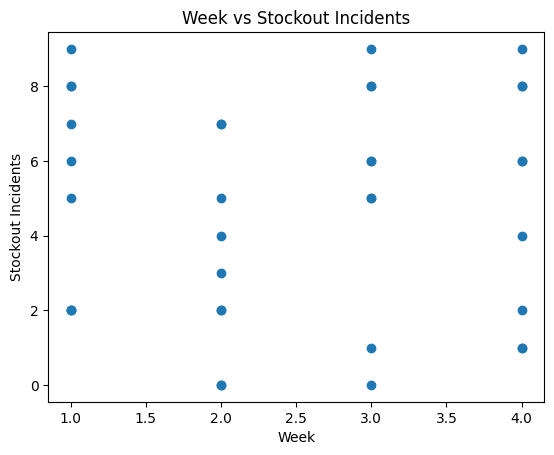

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


# 1. Loading datasets

orders = pd.read_csv("quickbazaar_orders.csv")
delivery = pd.read_csv("quickbazaar_delivery_operations.csv")
inventory = pd.read_csv("quickbazaar_inventory_data.csv")


# 2. Hypothesis 1: Orders dataset
# AOV vs Customer Rating
# H0: No correlation between AOV and rating
# H1: There is correlation
# Drop missing values
orders_clean = orders.dropna(subset=['AOV','CustomerRating'])

r_orders, p_orders = stats.pearsonr(orders_clean['AOV'], orders_clean['CustomerRating'])
print("\n--- Orders Dataset: AOV vs Customer Rating ---")
print("Pearson correlation coefficient:", r_orders)
print("p-value:", p_orders)
if p_orders < 0.05:
    print("Result: Reject H0 → Significant correlation exists")
else:
    print("Result: Fail to reject H0 → No significant correlation")

# Optional visualization
plt.scatter(orders_clean['AOV'], orders_clean['CustomerRating'])
plt.xlabel("AOV")
plt.ylabel("Customer Rating")
plt.title("AOV vs Customer Rating")
plt.show()


# 3. Hypothesis 2: Delivery dataset
# Time to Dispatch vs Time in Transit
# H0: No correlation
# H1: There is correlation

delivery_clean = delivery.dropna(subset=['TimeToDispatch','TimeInTransit'])

r_delivery, p_delivery = stats.pearsonr(delivery_clean['TimeToDispatch'], delivery_clean['TimeInTransit'])
print("\n--- Delivery Dataset: Time to Dispatch vs Time in Transit ---")
print("Pearson correlation coefficient:", r_delivery)
print("p-value:", p_delivery)
if p_delivery < 0.05:
    print("Result: Reject H0 → Significant correlation exists")
else:
    print("Result: Fail to reject H0 → No significant correlation")

# Optional visualization
plt.scatter(delivery_clean['TimeToDispatch'], delivery_clean['TimeInTransit'])
plt.xlabel("Time to Dispatch")
plt.ylabel("Time in Transit")
plt.title("Time to Dispatch vs Time in Transit")
plt.show()


# 4. Hypothesis 3: Inventory dataset
# Week vs Stockout Incidents (numeric trend)
# H0: No correlation
# H1: Stockout incidents change over weeks

inventory_clean = inventory.dropna(subset=['Week','StockoutIncidents']).copy()
inventory_clean['Week_Numeric'] = inventory_clean['Week'].str.extract(r'(\d+)').astype(int)

r_inventory, p_inventory = stats.pearsonr(inventory_clean['Week_Numeric'], inventory_clean['StockoutIncidents'])
print("\n--- Inventory Dataset: Week vs Stockout Incidents ---")
print("Pearson correlation coefficient:", r_inventory)
print("p-value:", p_inventory)
if p_inventory < 0.05:
    print("Result: Reject H0 → Significant correlation exists")
else:
    print("Result: Fail to reject H0 → No significant correlation")

# Optional visualization
plt.scatter(inventory_clean['Week_Numeric'], inventory_clean['StockoutIncidents'])
plt.xlabel("Week")
plt.ylabel("Stockout Incidents")
plt.title("Week vs Stockout Incidents")
plt.show()